Importaciones

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Lectura de datos

In [3]:
df= pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


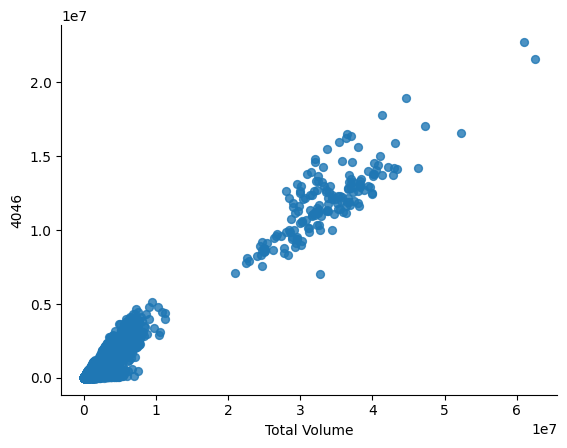

In [4]:
# @title Total Volume vs Plu 4046

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Total Volume', y='4046', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Cálculo de la Correlación entre Variables Independientes y Dependientes:

In [5]:
df_subset = df[['Total Volume','4046']]

def calcular_correlacion(x, y):
    correlacion = np.corrcoef(x, y)[0, 1]
    return correlacion
correlacion = calcular_correlacion(df['Total Volume'], df['4046'])
print("La correlación entre el Volumen total y Aguacates de plu 4046 es:", correlacion)


La correlación entre el Volumen total y Aguacates de plu 4046 es: 0.97786315902292


Modelo de regresión lineal

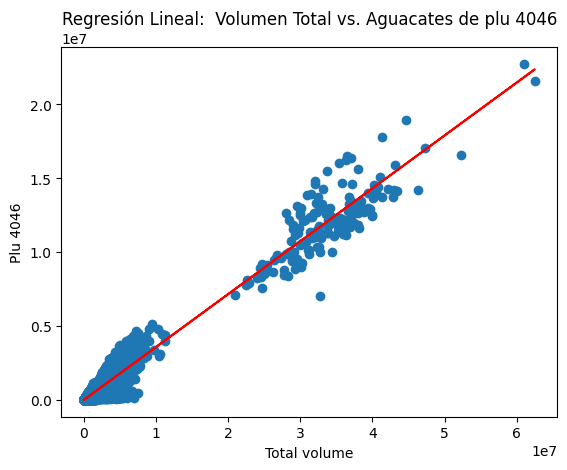

In [6]:
from sklearn.linear_model import LinearRegression

modelo_regresion = LinearRegression()
modelo_regresion.fit(df['Total Volume'].values.reshape(-1, 1), df['4046'])

plt.scatter(df['Total Volume'], df['4046'])
plt.plot(df['Total Volume'], modelo_regresion.predict(df['Total Volume'].values.reshape(-1, 1)), color='red')
plt.xlabel('Total volume')
plt.ylabel('Plu 4046')
plt.title('Regresión Lineal:  Volumen Total vs. Aguacates de plu 4046')
plt.show()

Regresión Polinomial

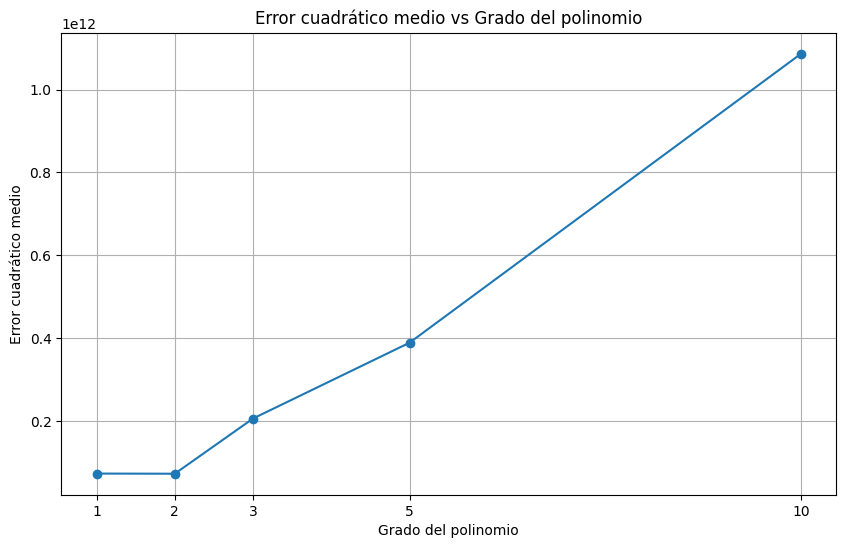

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_subset[['Total Volume']]
Y = df_subset['4046']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

# Ajustar diferentes grados de polinomios y calcular el error cuadrático medio en el conjunto de prueba
degrees = [1, 2, 3, 5, 10]
mse_list = []

for degree in degrees:
	poly_features = PolynomialFeatures(degree=degree)
	X_train_poly = poly_features.fit_transform(X_train)
	X_test_poly = poly_features.transform(X_test)

	model = LinearRegression()
	model.fit(X_train_poly, Y_train)

	Y_pred = model.predict(X_test_poly)
	mse = mean_squared_error(Y_test, Y_pred)
	mse_list.append(mse)

# Graficar el error cuadrático medio en función del grado del polinomio
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_list, marker='o')
plt.title('Error cuadrático medio vs Grado del polinomio')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático medio')
plt.xticks(degrees)
plt.grid(True)
plt.show()

Regresión Logarítmica

In [8]:
from scipy.optimize import curve_fit


X1 = df_subset['Total Volume']
Y1 = df_subset['4046']


def logarithmic_function(x, a, b):
	return a * np.log(X1) + b

# Ajustar la curva logarítmica a los datos
params, _ = curve_fit(logarithmic_function, X1, Y1)
a, b = params

print("Coeficiente 'a':", a)
print("Coeficiente 'b':", b)


Coeficiente 'a': 243235.44934494974
Coeficiente 'b': -2459515.4697670857


Código sugerido por ChatGPT

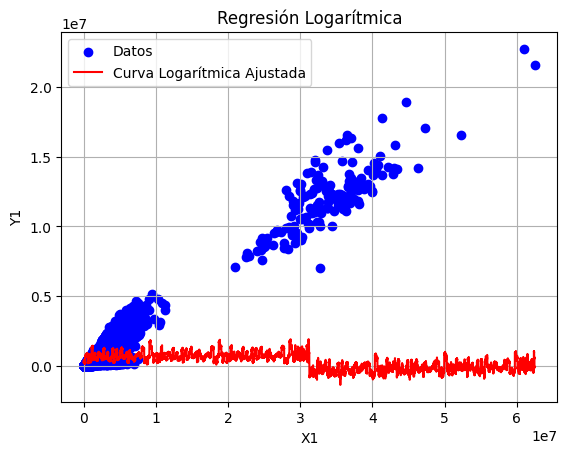

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.scatter(X1, Y1, color='blue', label='Datos')
x_fit = np.linspace(min(X1), max(X1), 18249)
y_fit = logarithmic_function(x_fit, *params)
plt.plot(x_fit, y_fit, color='red', label='Curva Logarítmica Ajustada')

# Configuración de la gráfica
plt.title('Regresión Logarítmica')
plt.xlabel('X1')
plt.ylabel('Y1')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

Regresión Logística

Código proporcinado por ChatGPT

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
# Definir características y variable objetivo
# Assuming 'AveragePrice' needs to be classified, we need to convert it to a binary variable
threshold = df['AveragePrice'].median()  # Choose a threshold to binarize
y = (df['AveragePrice'] > threshold).astype(int)

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construir el modelo de regresión logística
model = Sequential()
model.add(Dense(1, input_dim=X_train_scaled.shape[1], activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_test_scaled, y_test))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/100
1460/1460 [==============================] - 4s 2ms/step - loss: 0.7382 - accuracy: 0.5007 - val_loss: 0.6672 - val_accuracy: 0.6085
Epoch 2/100
1460/1460 [==============================] - 5s 3ms/step - loss: 0.6511 - accuracy: 0.6231 - val_loss: 0.6474 - val_accuracy: 0.6268
Epoch 3/100
1460/1460 [==============================] - 3s 2ms/step - loss: 0.6357 - accuracy: 0.6403 - val_loss: 0.6410 - val_accuracy: 0.6378
Epoch 4/100
1460/1460 [==============================] - 3s 2ms/step - loss: 0.6292 - accuracy: 0.6563 - val_loss: 0.6390 - val_accuracy: 0.6474
Epoch 5/100
1460/1460 [==============================] - 3s 2ms/step - loss: 0.6261 - accuracy: 0.6629 - val_loss: 0.6386 - val_accuracy: 0.6638
Epoch 6/100
1460/1460 [==============================] - 3s 2ms/step - loss: 0.6243 - accuracy: 0.6737 - val_loss: 0.6382 - val_accuracy: 0.6616
Epoch 7/100
1460/1460 [==============================] - 3s 2ms/step - loss: 0.6231 - accuracy: 0.6701 - val_loss: 0.6384 - val_ac

32290/32290 [==============================] - 42s 1ms/step


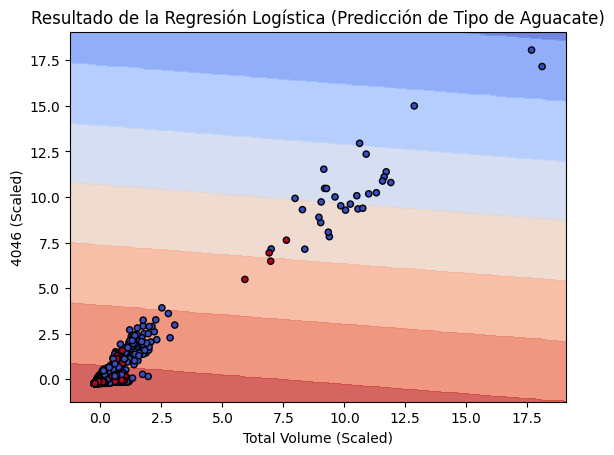

In [37]:
# Función para plotear el resultado del modelo
def plot_decision_boundary(X, y, model, scaler):
    h = .02  # Tamaño del paso en la malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Necesitamos completar xx y yy con ceros para las características adicionales
    Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel(), np.zeros((xx.ravel().shape[0], 2))]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel('Total Volume (Scaled)')
    plt.ylabel('4046 (Scaled)')
    plt.title('Resultado de la Regresión Logística (Predicción de Tipo de Aguacate)')
    plt.show()

# Preparar datos para plotear
X_test_plot = X_test_scaled[:, [0, 1]]  # Seleccionando 'Total Volume' y '4046'

# Plotear el resultado del modelo
plot_decision_boundary(X_test_plot, y_test, model, scaler)

In [38]:
# Hacer predicciones sobre los datos de prueba
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convertir probabilidades en etiquetas binarias

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

# Mostrar la matriz de confusión y el reporte de clasificación
print('Matriz de Confusión:')
print(confusion_matrix(y_test, y_pred))
print('\nReporte de Clasificación:')
print(classification_report(y_test, y_pred))

115/115 [==============================] - 0s 1ms/step
Precisión del modelo: 0.6969863013698631
Matriz de Confusión:
[[ 886  907]
 [ 199 1658]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.49      0.62      1793
           1       0.65      0.89      0.75      1857

    accuracy                           0.70      3650
   macro avg       0.73      0.69      0.68      3650
weighted avg       0.73      0.70      0.68      3650



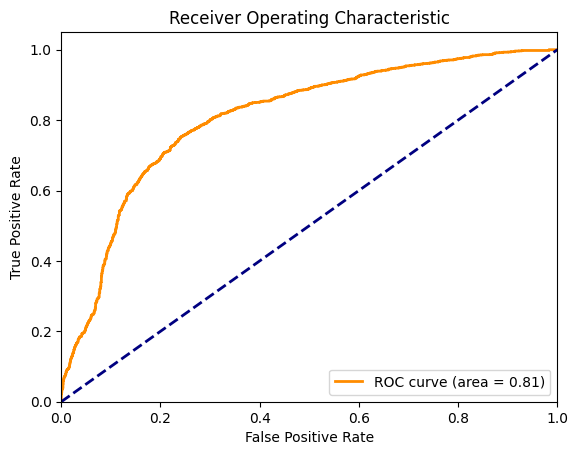

In [39]:
# Calcular y plotear la curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()